In [48]:
# I initially finished this project back in 2018 using excel and MATLAB
# However, I am re-writting it using Python and its data packages to better clarity :)

# Importing the Packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
import statsmodels.api as sm

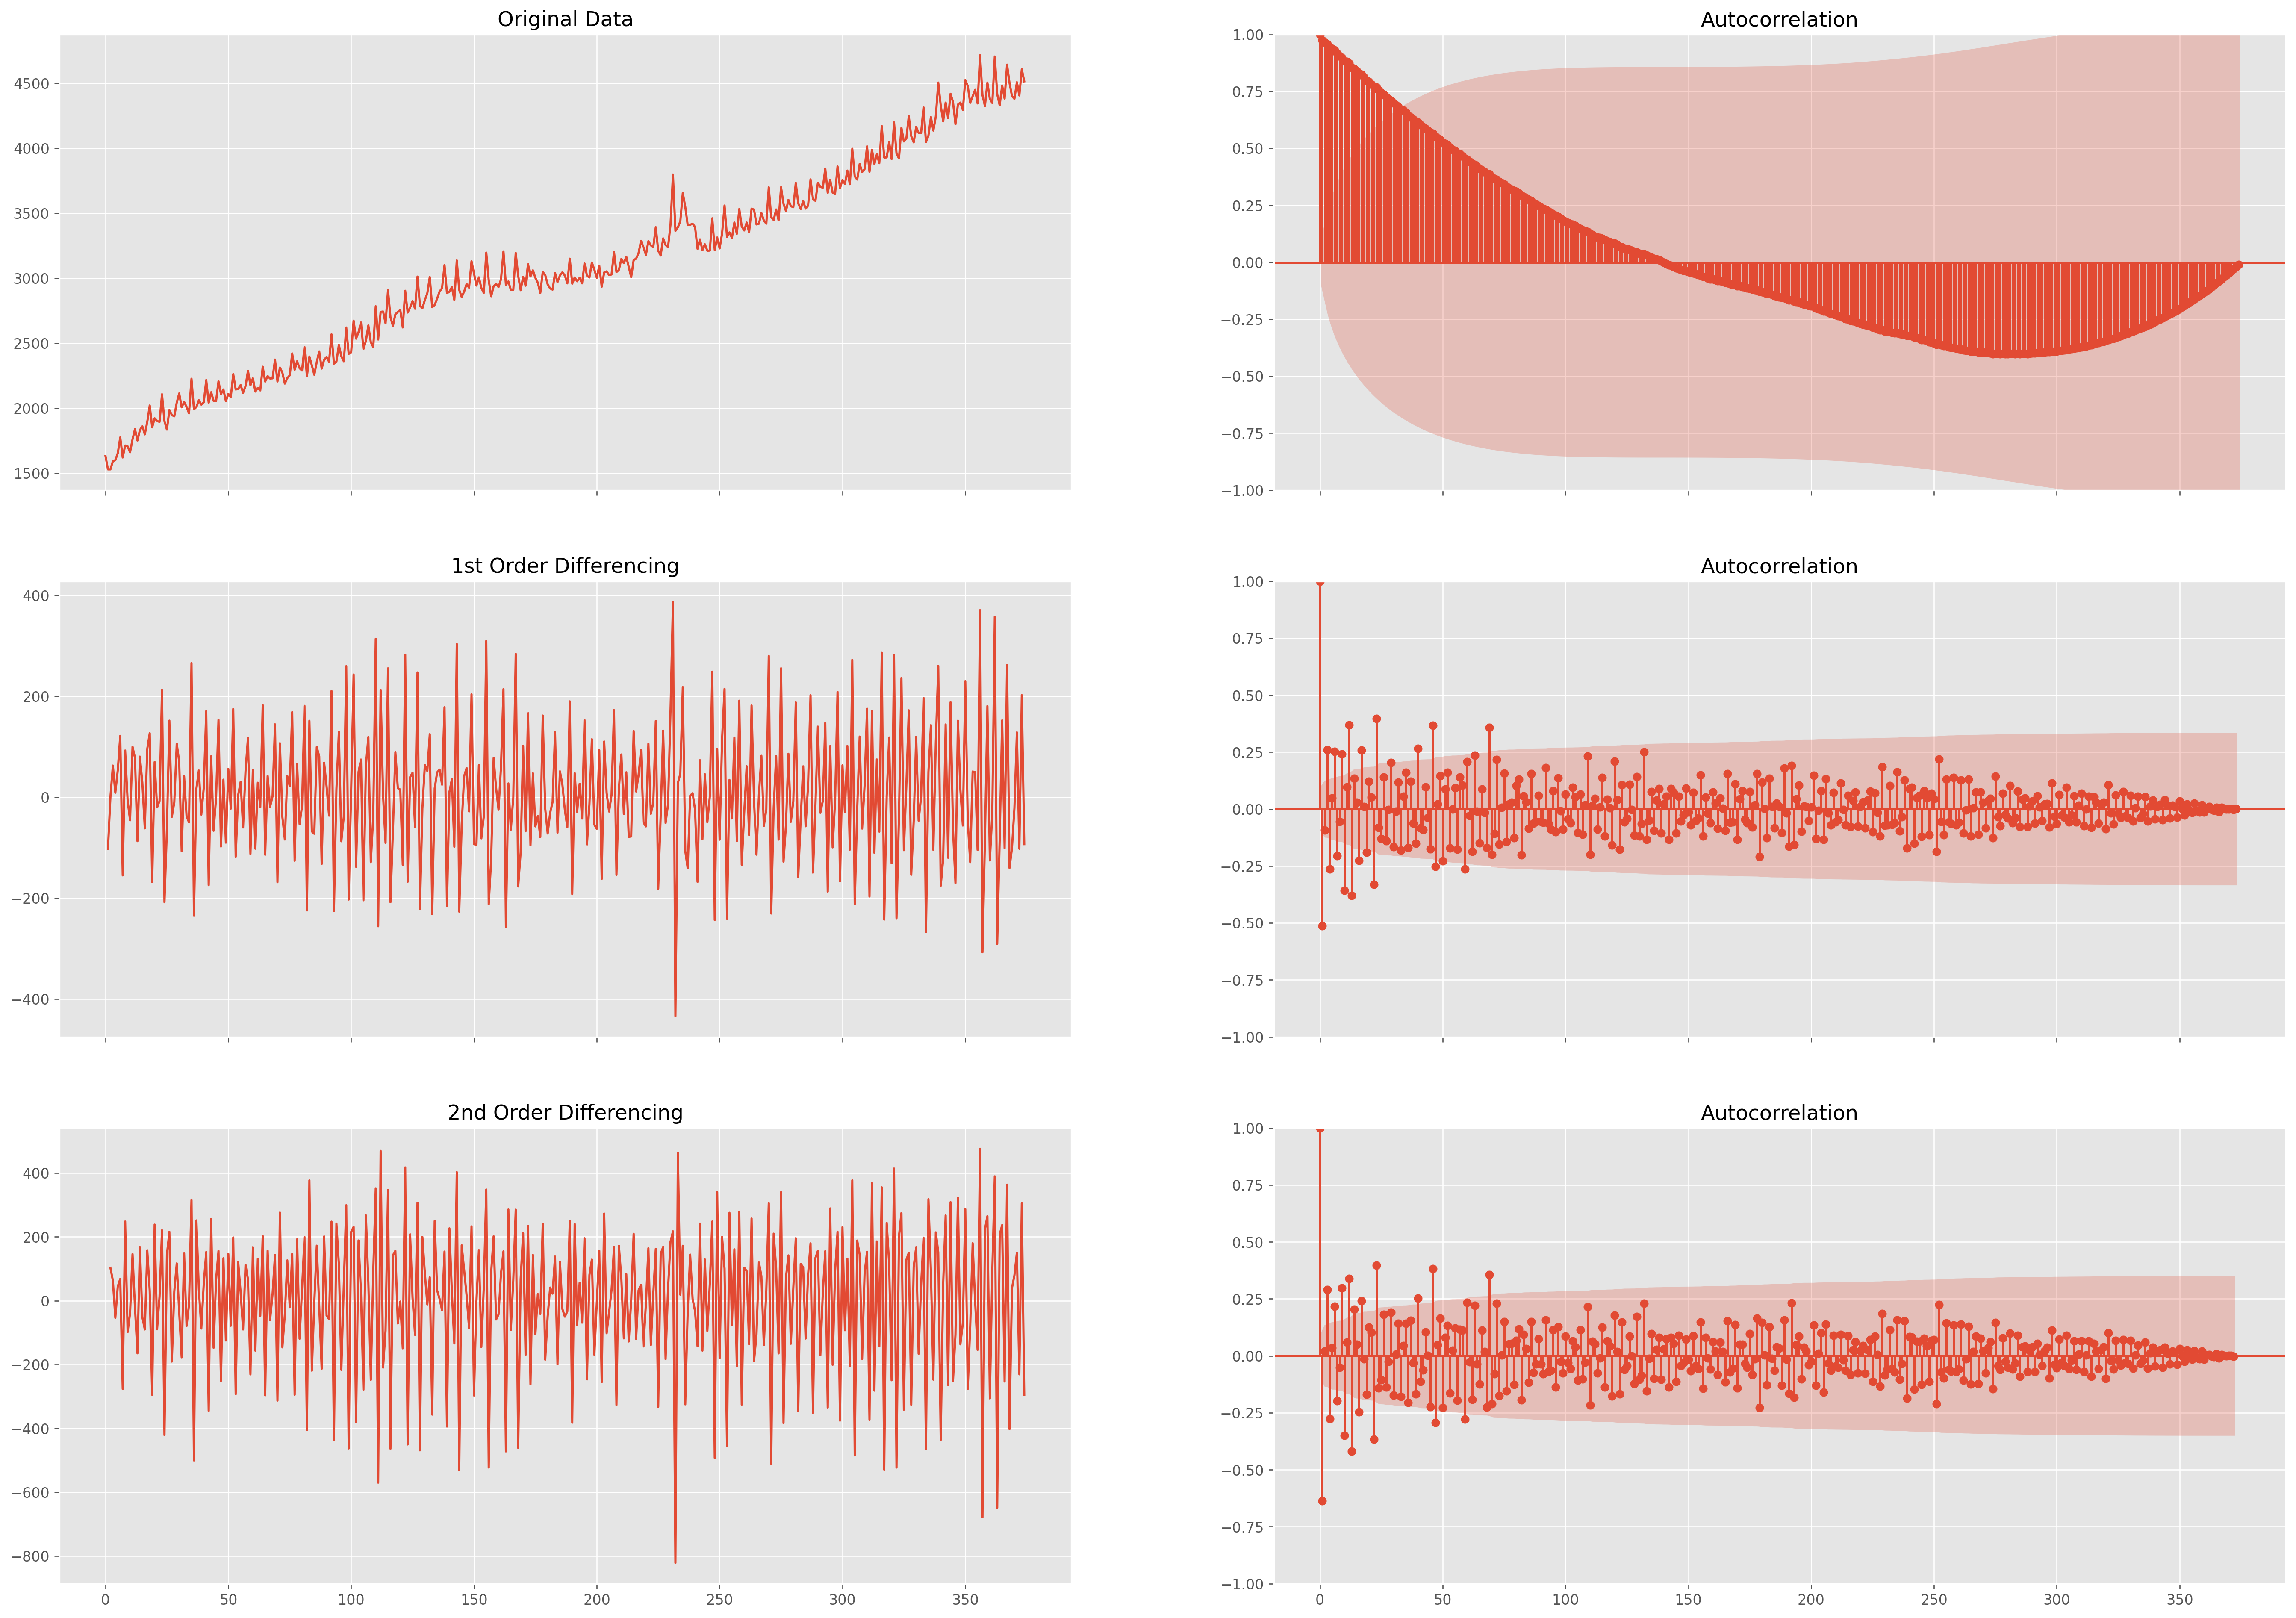

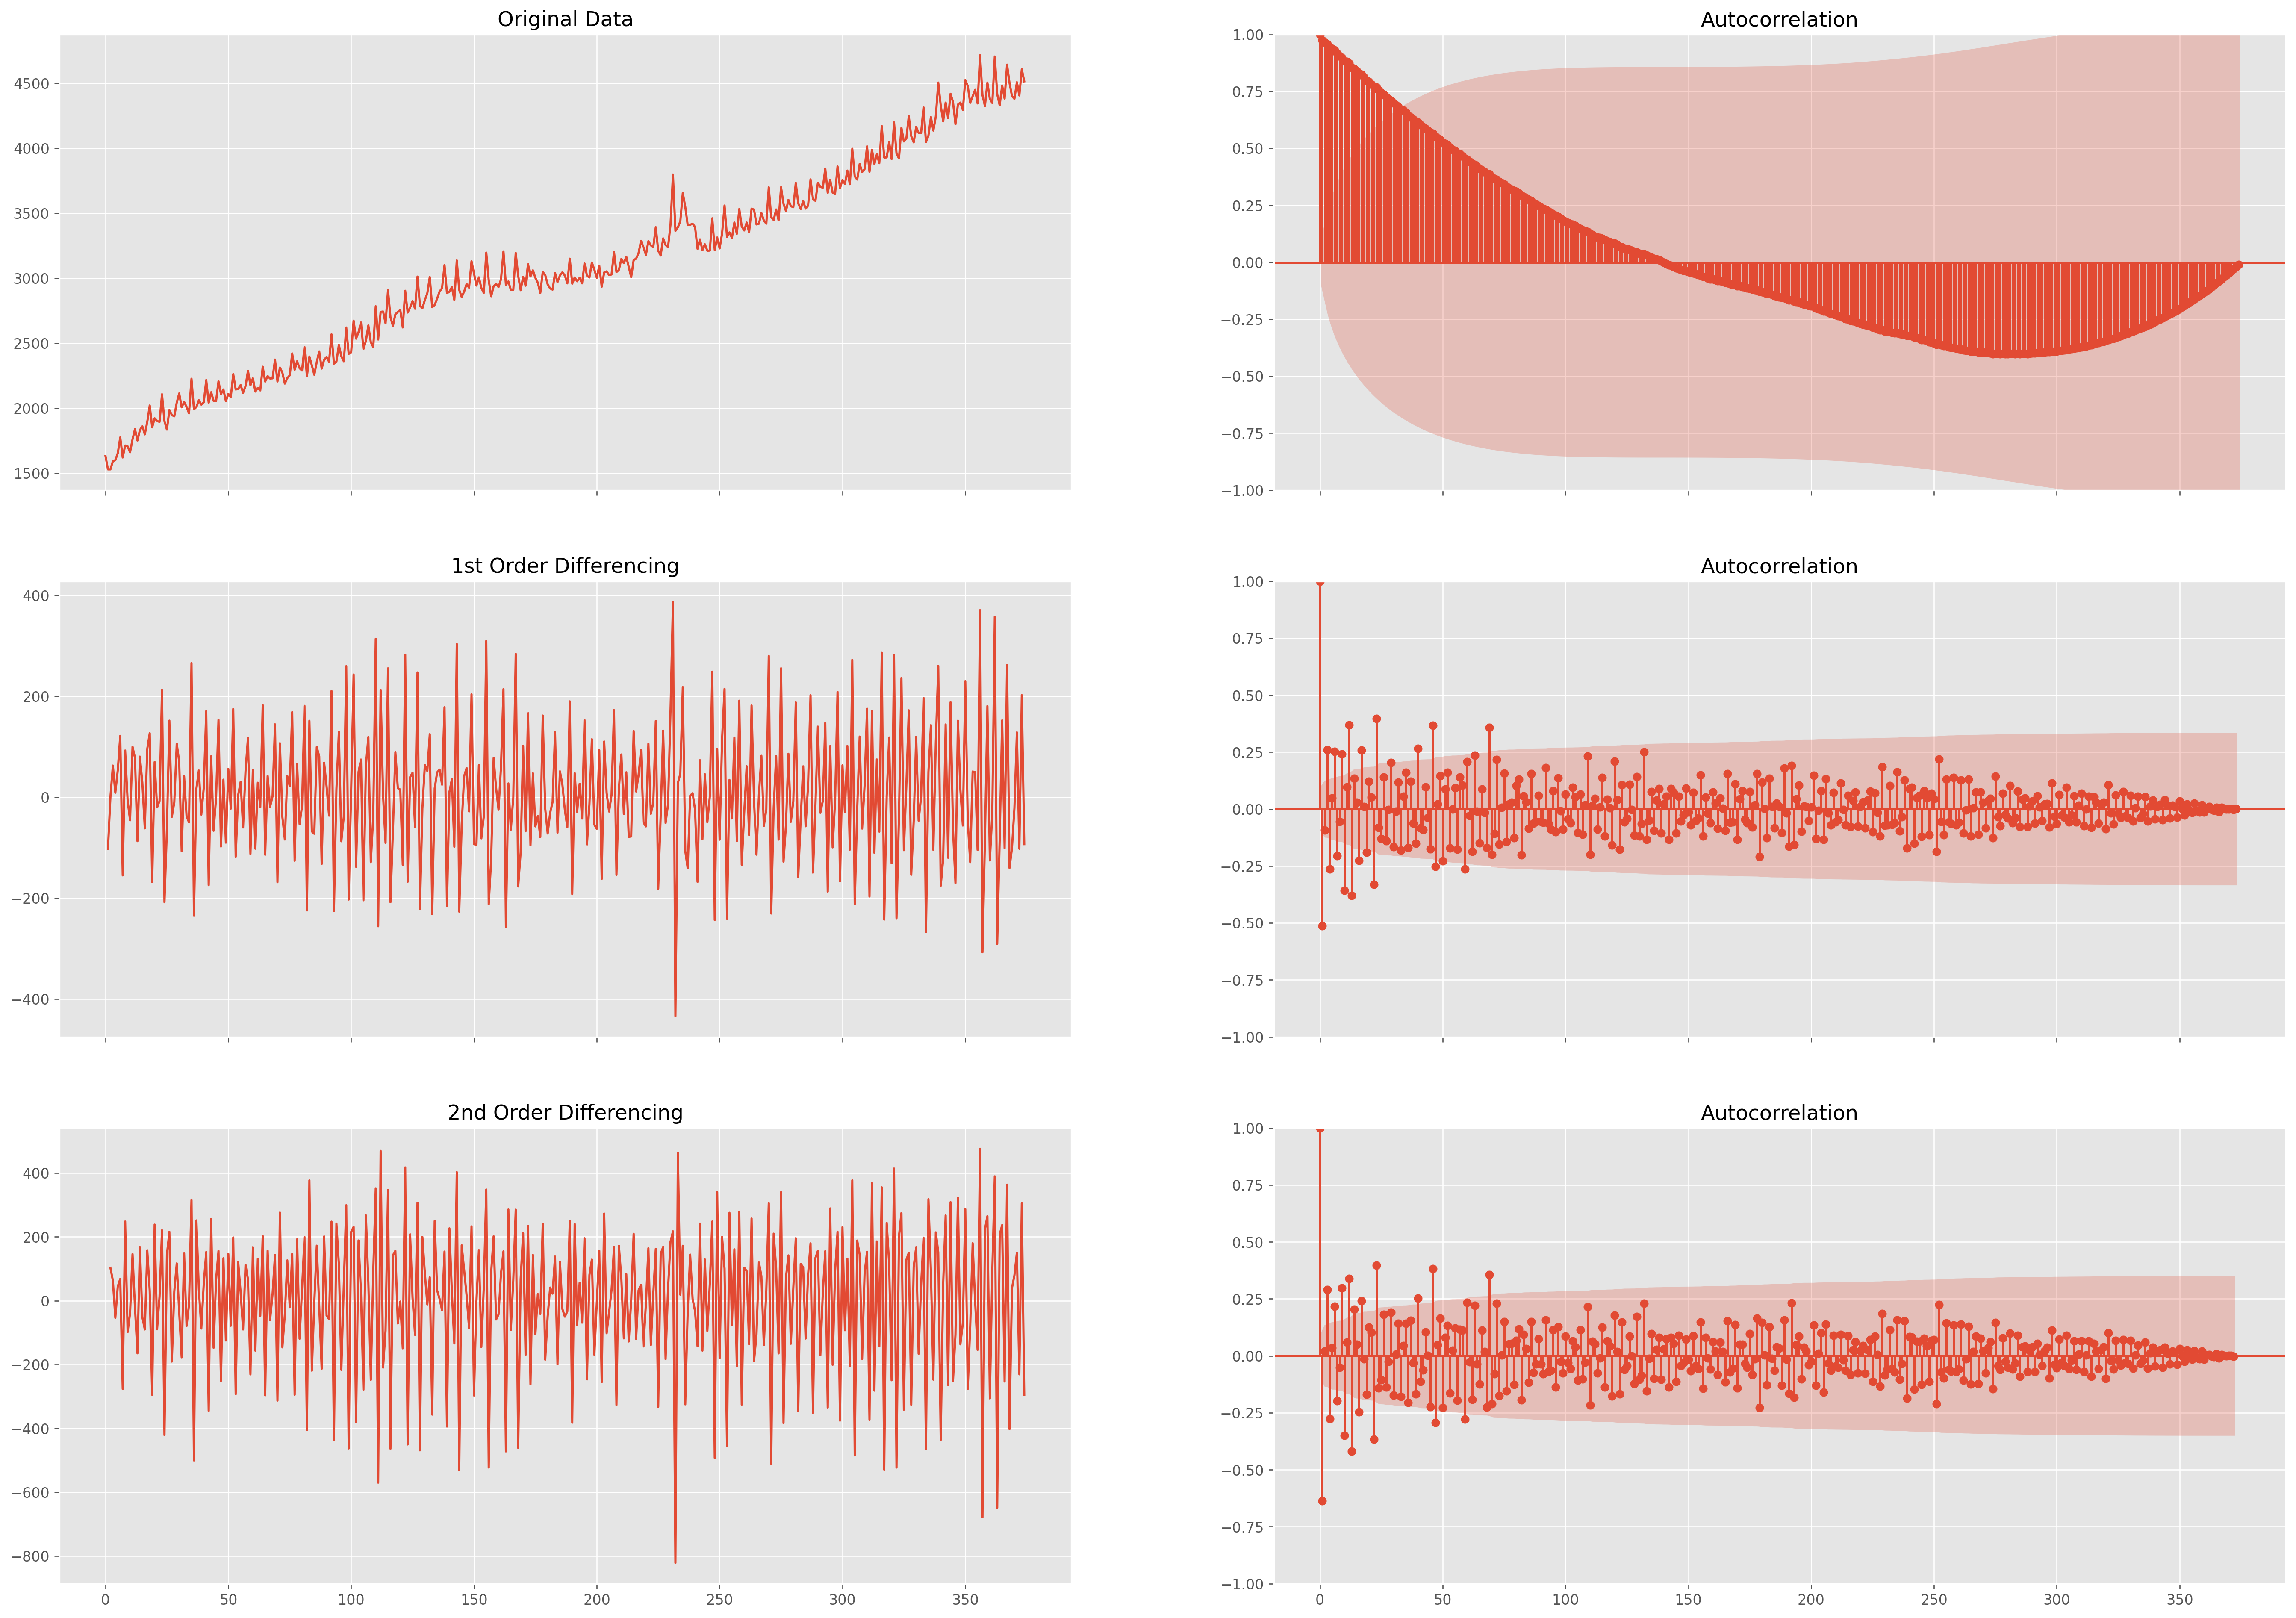

In [49]:
# Importing the data and generating the ACF for original data, 1st order differencing, and 2nd order differencing
df = pd.read_csv('https://raw.githubusercontent.com/KelvinJSon/Time-Series-Canadian-Salary-Trend/main/Data/Salary_Data.csv', names=['Value'], header=0)

result = adfuller(df.Value.dropna())
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize':(28,20), 'figure.dpi':240})

# Generate backdrop for graphs
fig, disp_window = plt.subplots(3, 2, sharex=True)
disp_window[0, 0].plot(df); disp_window[0, 0].set_title('Original Data')
plot_acf(df, lags=374, ax = disp_window[0, 1])

# 1st Order Differencing
disp_window[1, 0].plot(df.diff()); disp_window[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), lags = 373, ax=disp_window[1, 1])

# 2nd Order Differencing
disp_window[2, 0].plot(df.diff().diff()); disp_window[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), lags = 372, ax=disp_window[2, 1])

C:\Users\Kelvin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


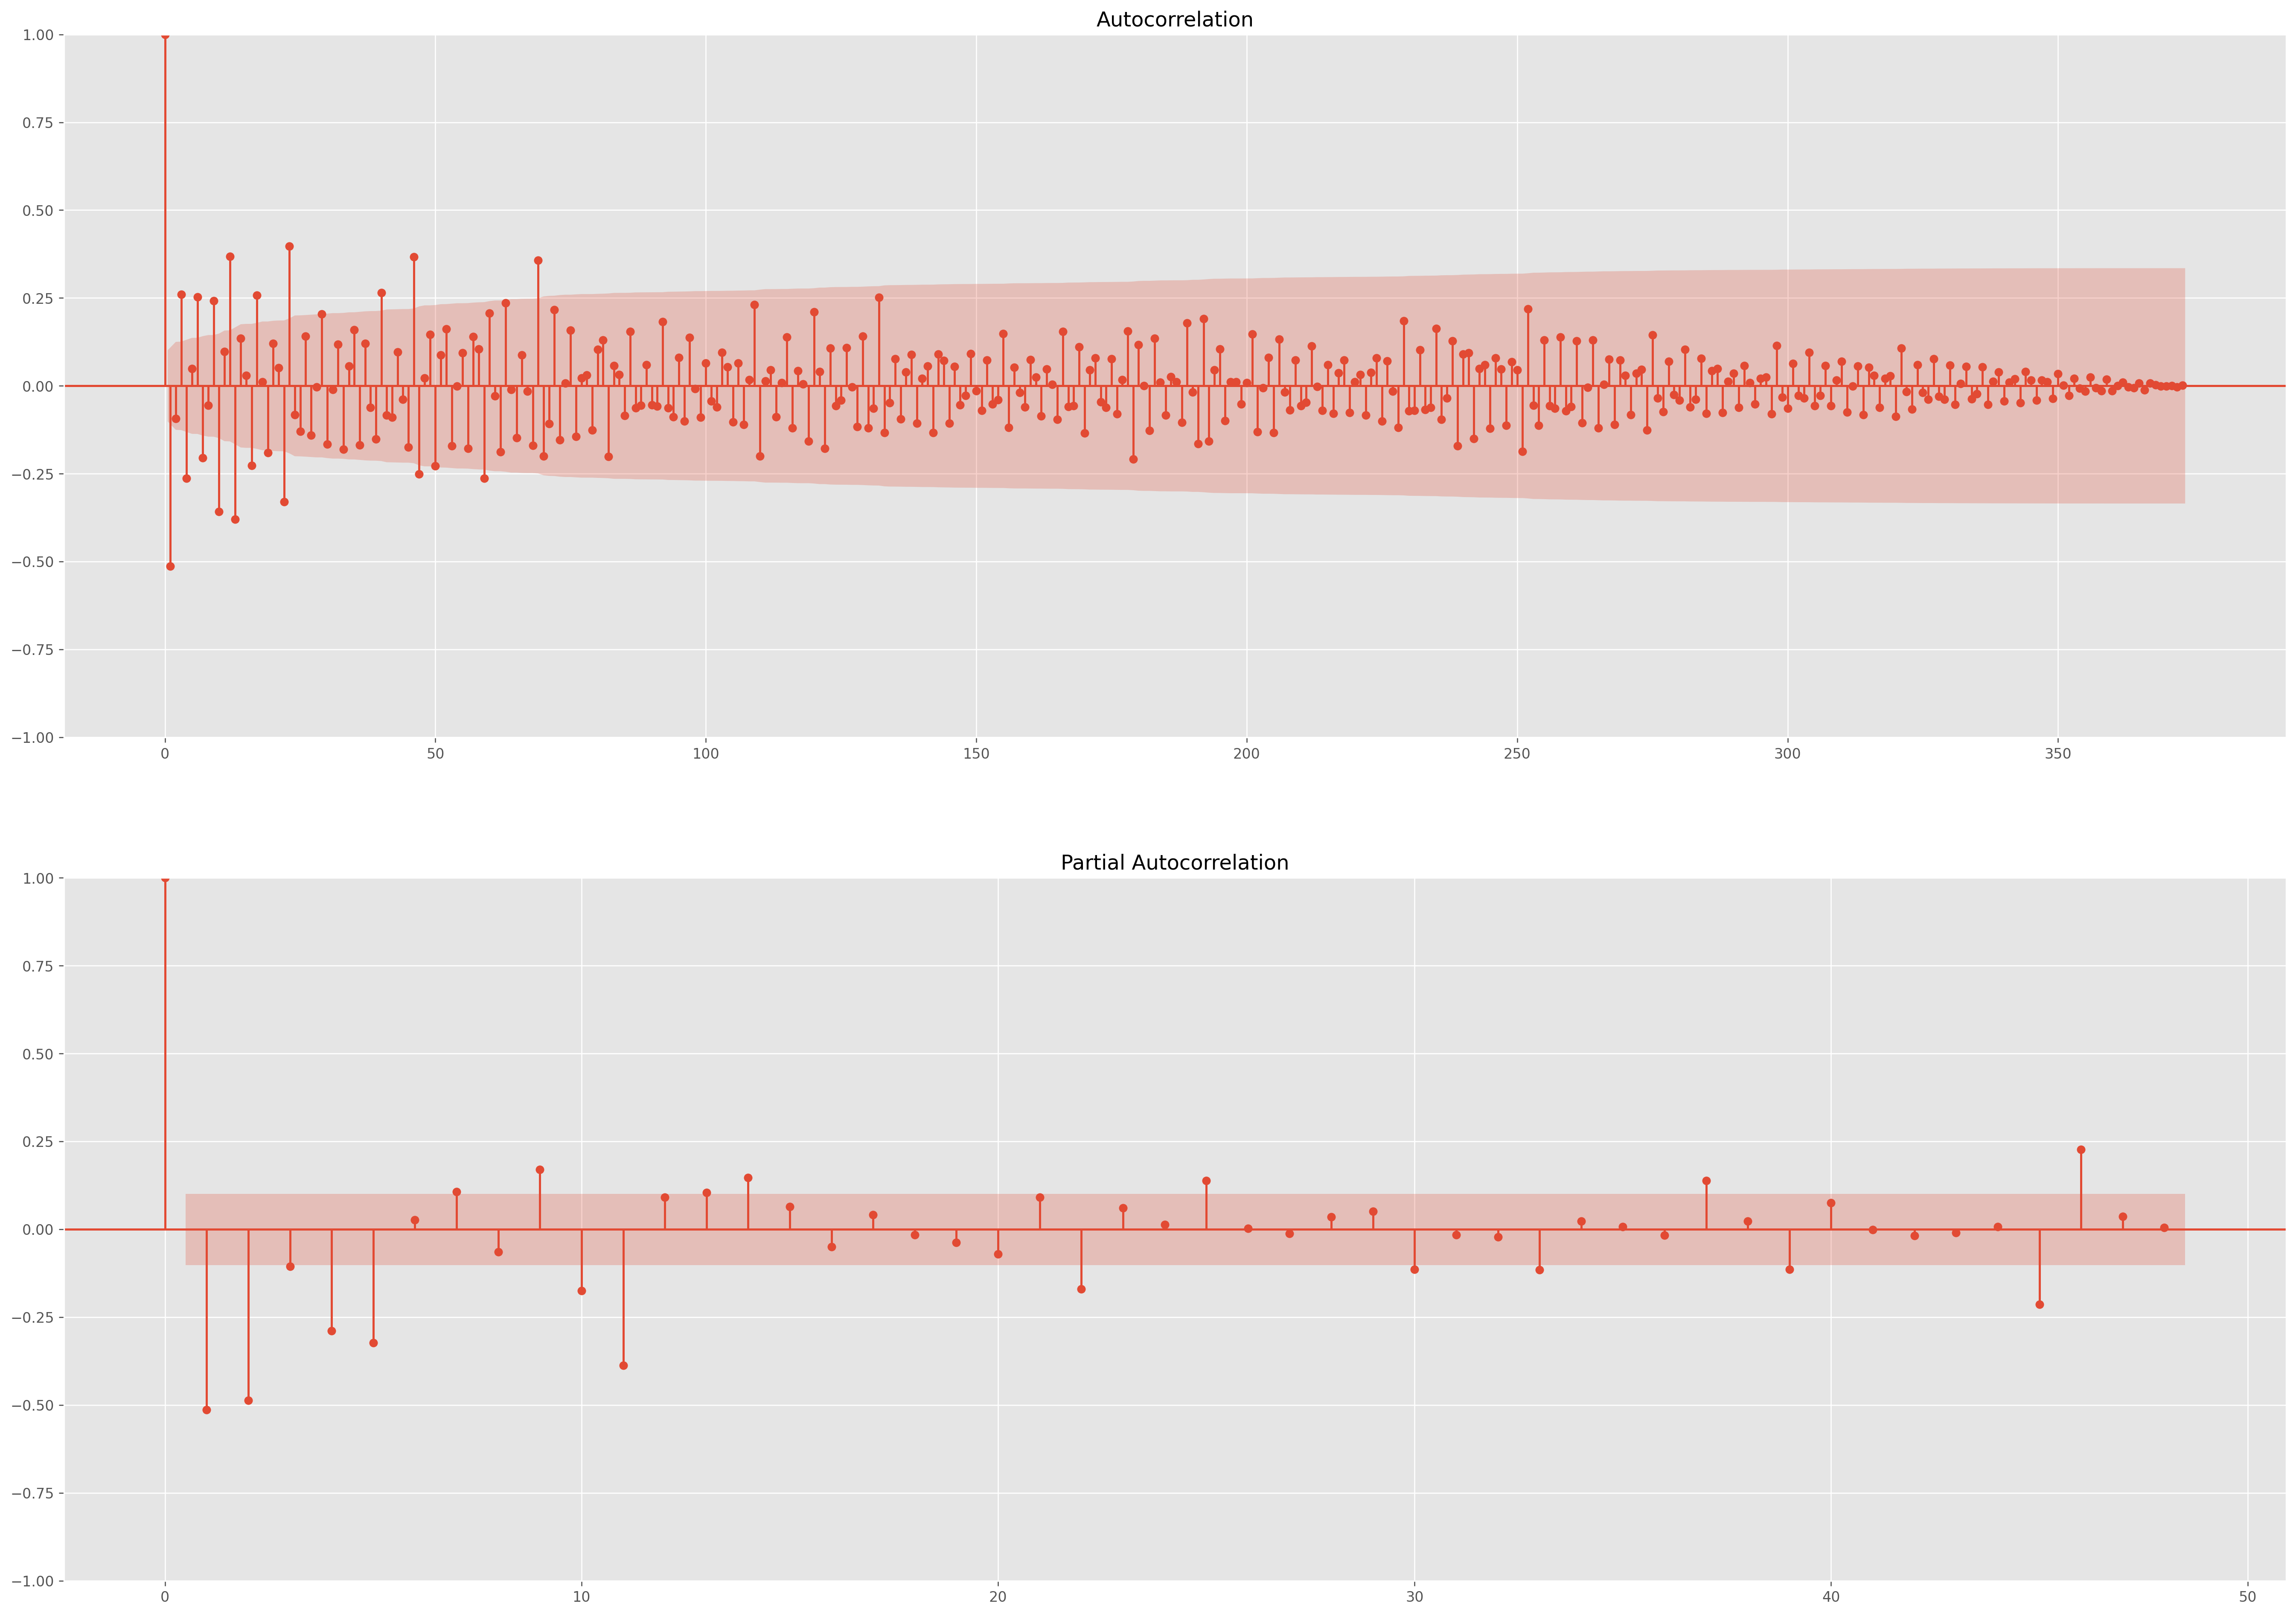

In [83]:
# PACF generation based on first order differencing
df['First Order Difference'] = df['Value'] - df['Value'].shift(1)

# The seaonsality can be seen from the PACF graph (every 12th lag)

# Comparing with ACF
fig = plt.figure(figsize=(28,20))
fig = sm.graphics.tsa.plot_acf(df['First Order Difference'].dropna(),lags=373,ax=fig.add_subplot(211))
fig = sm.graphics.tsa.plot_pacf(df['First Order Difference'].dropna(),lags=48,ax=fig.add_subplot(212))


In [ ]:
# Summary of the best SARIMA model chosen for this time series
best_model = SARIMAX(df['Value'], order=(4, 1, 4), seasonal_order=(2, 1, 2, 12)).fit(dis=-1)
print(best_model.summary())

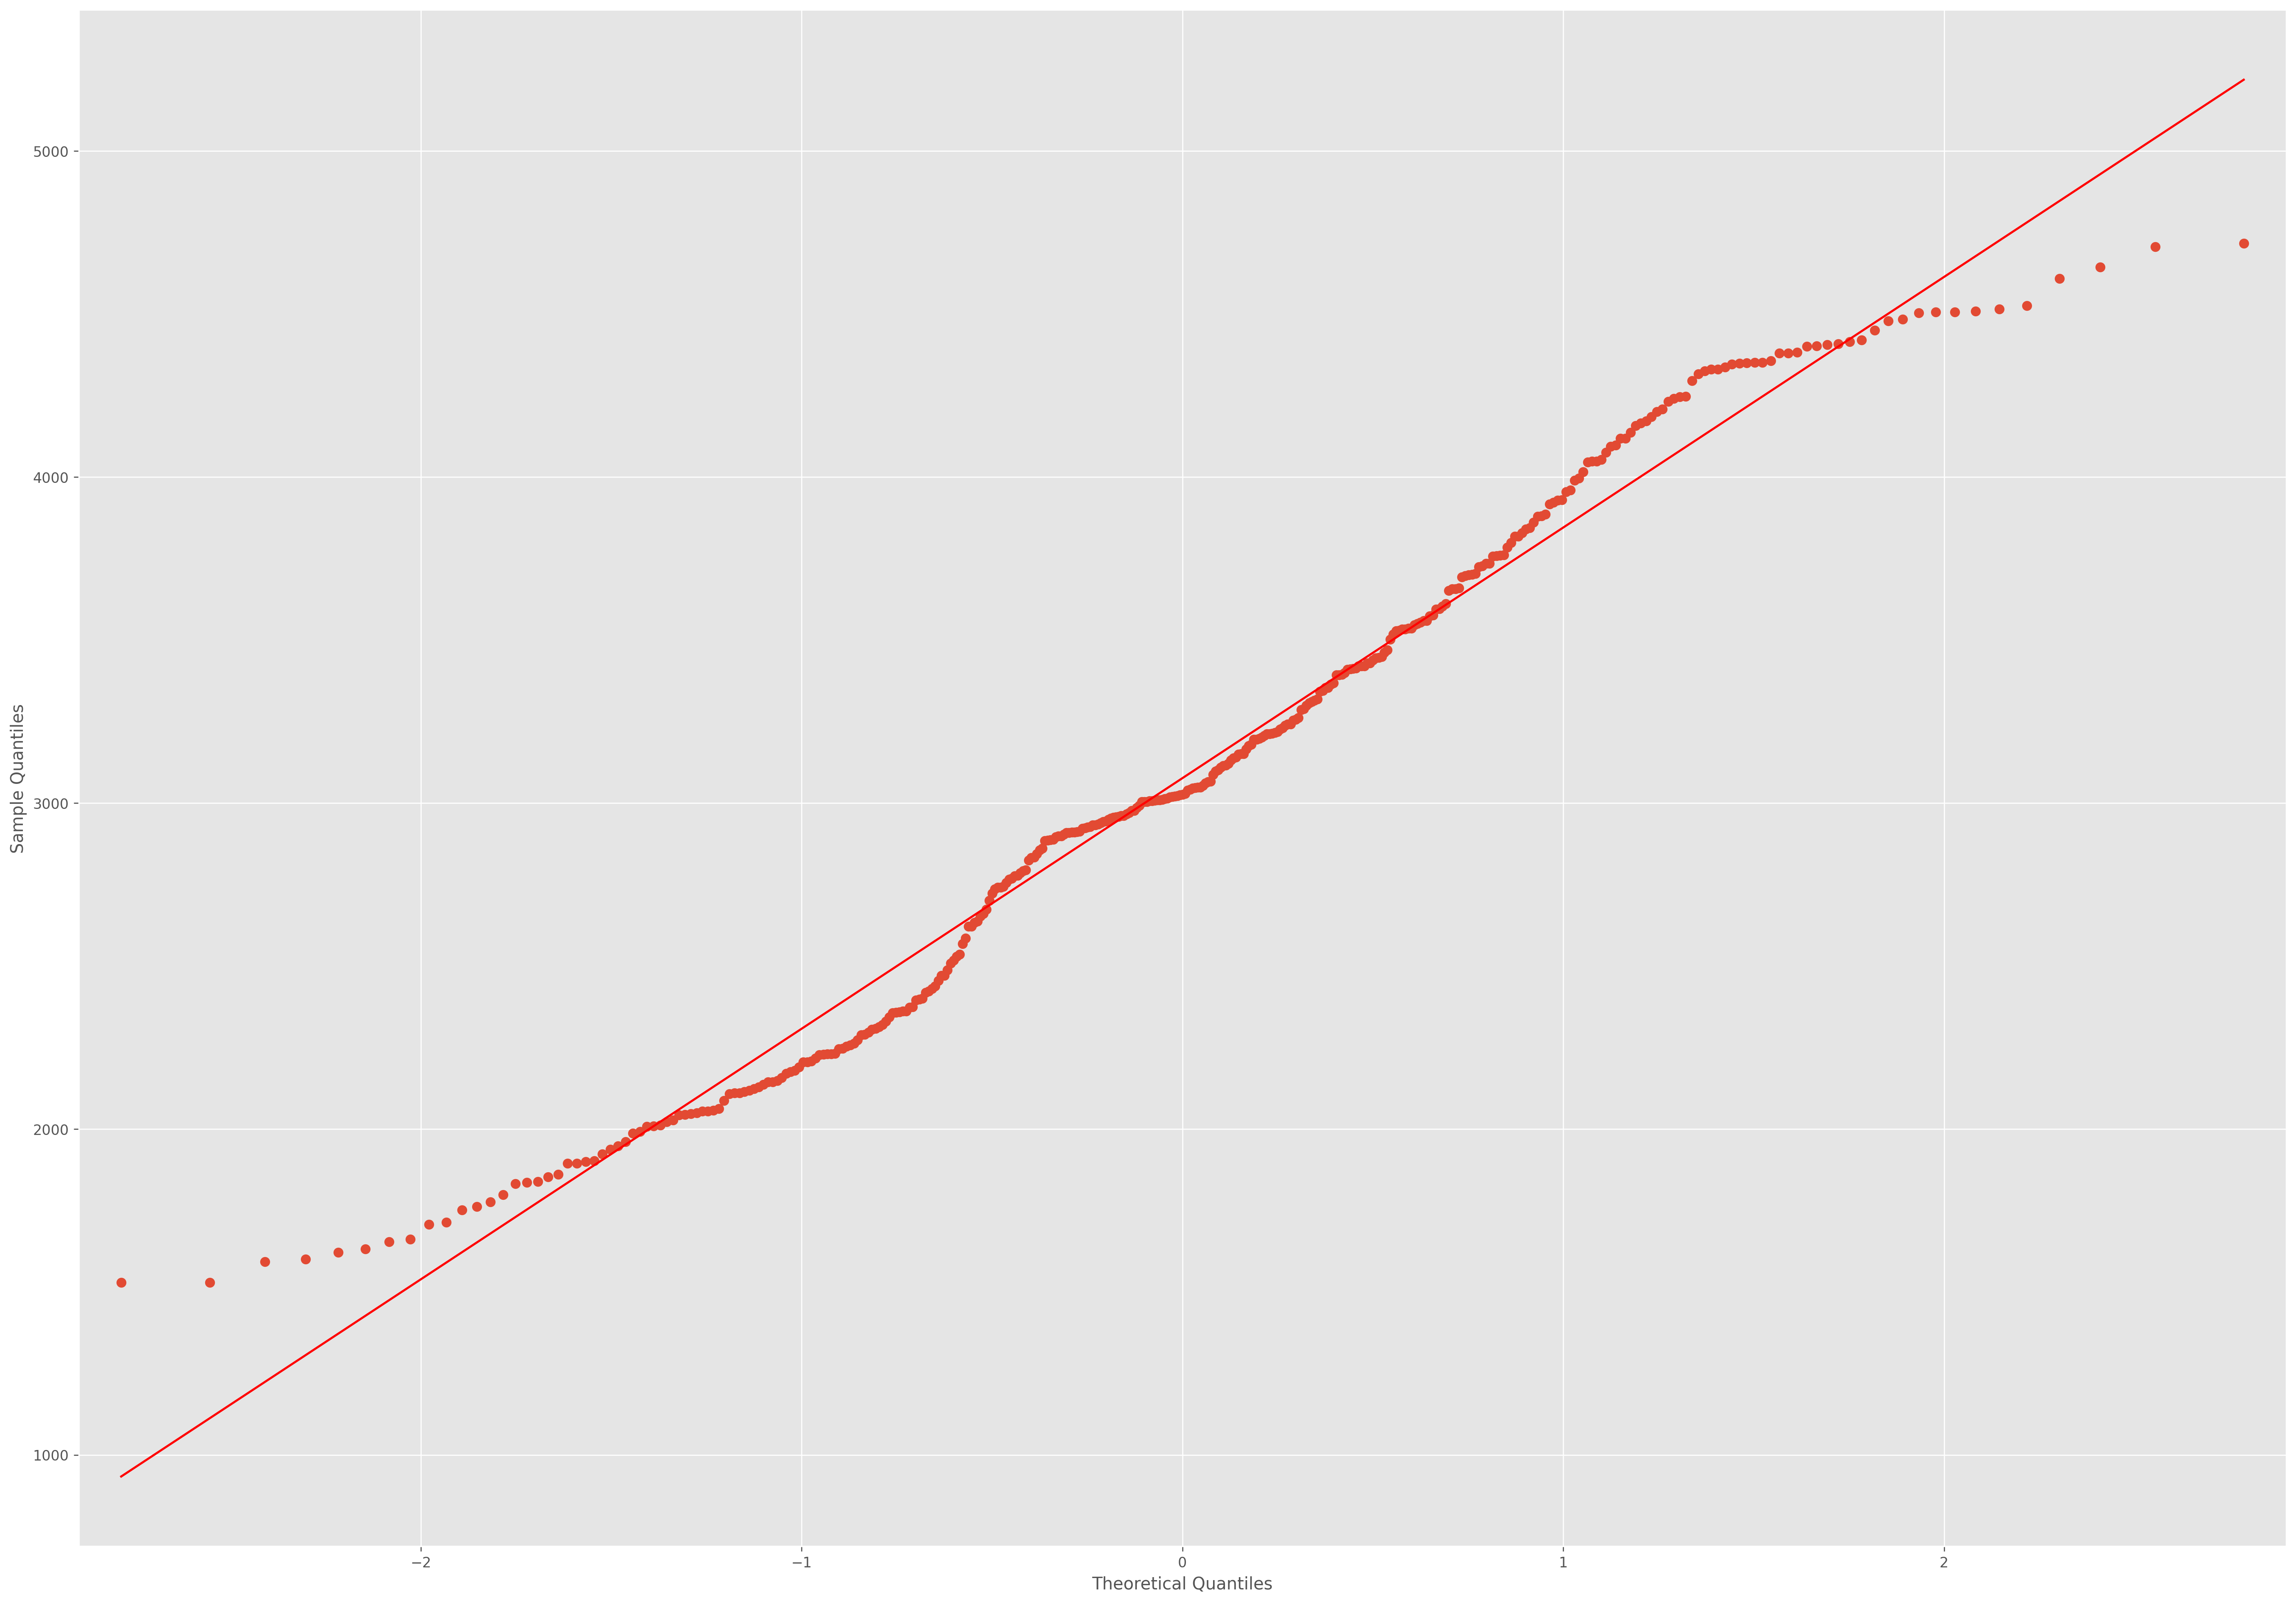

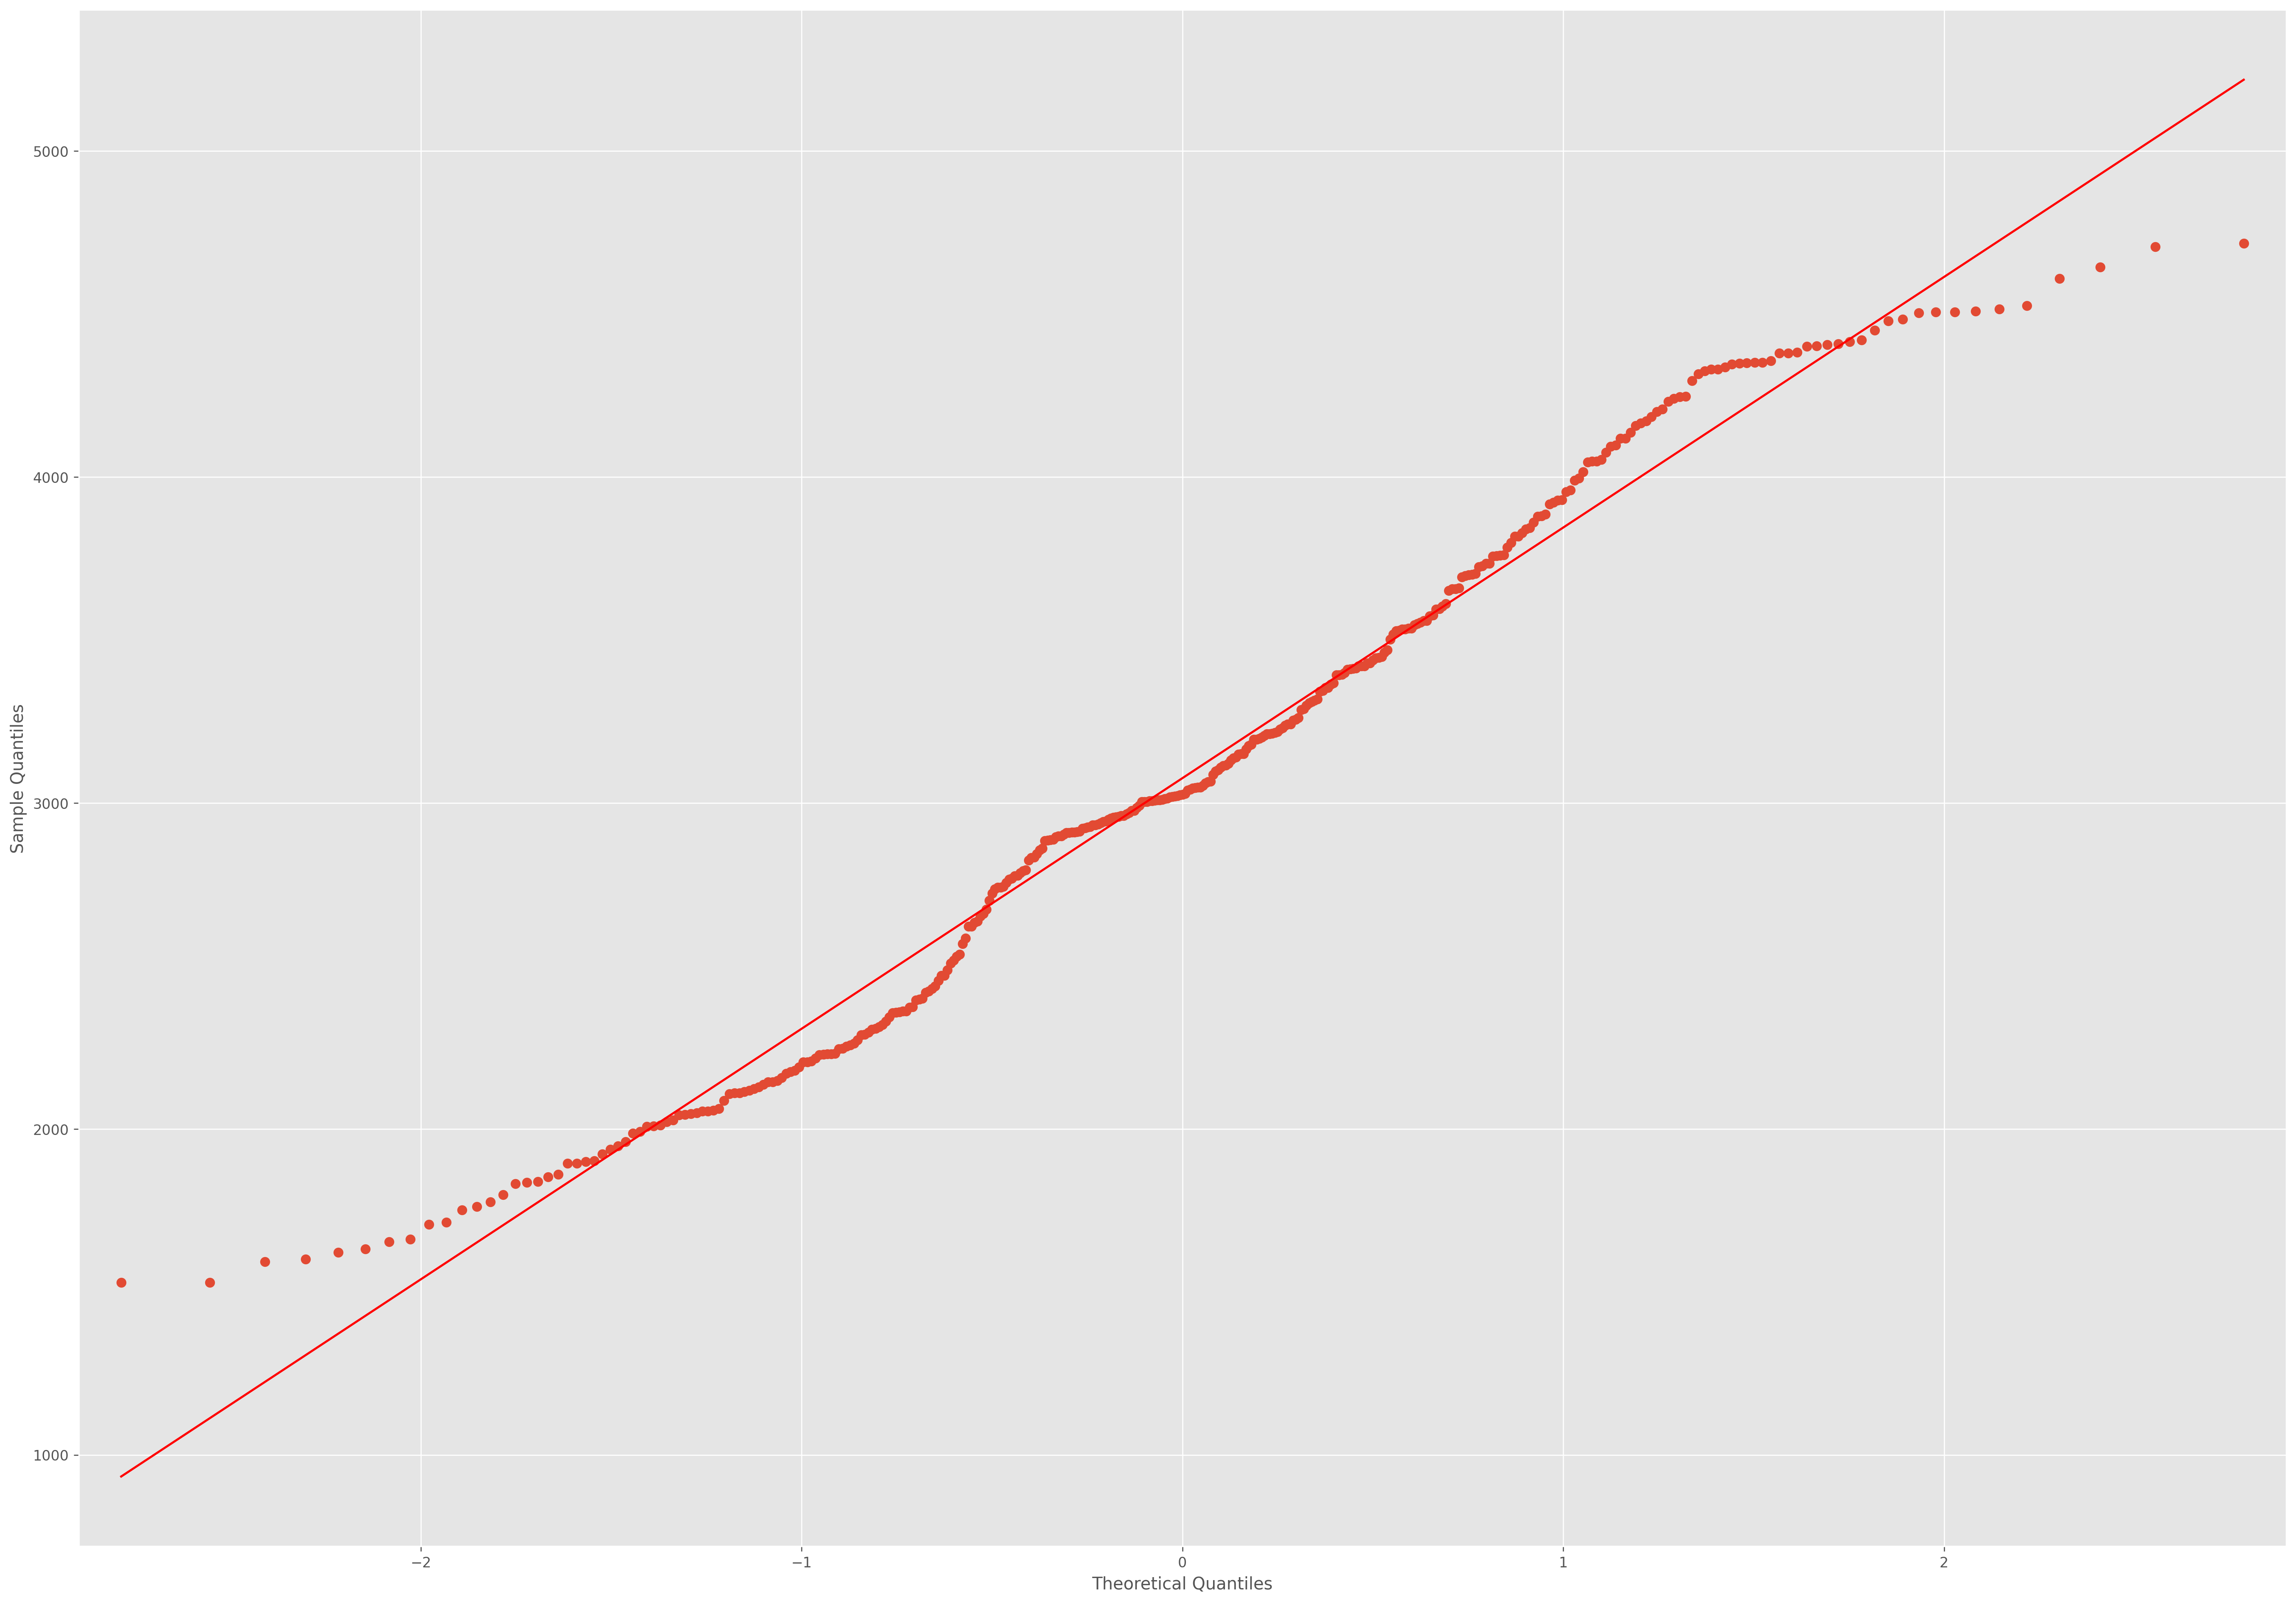

In [92]:
# Diagnostic checking of Normal Probability Plot - to be compared with the one in my report
sm.qqplot(df.Value, line='s')


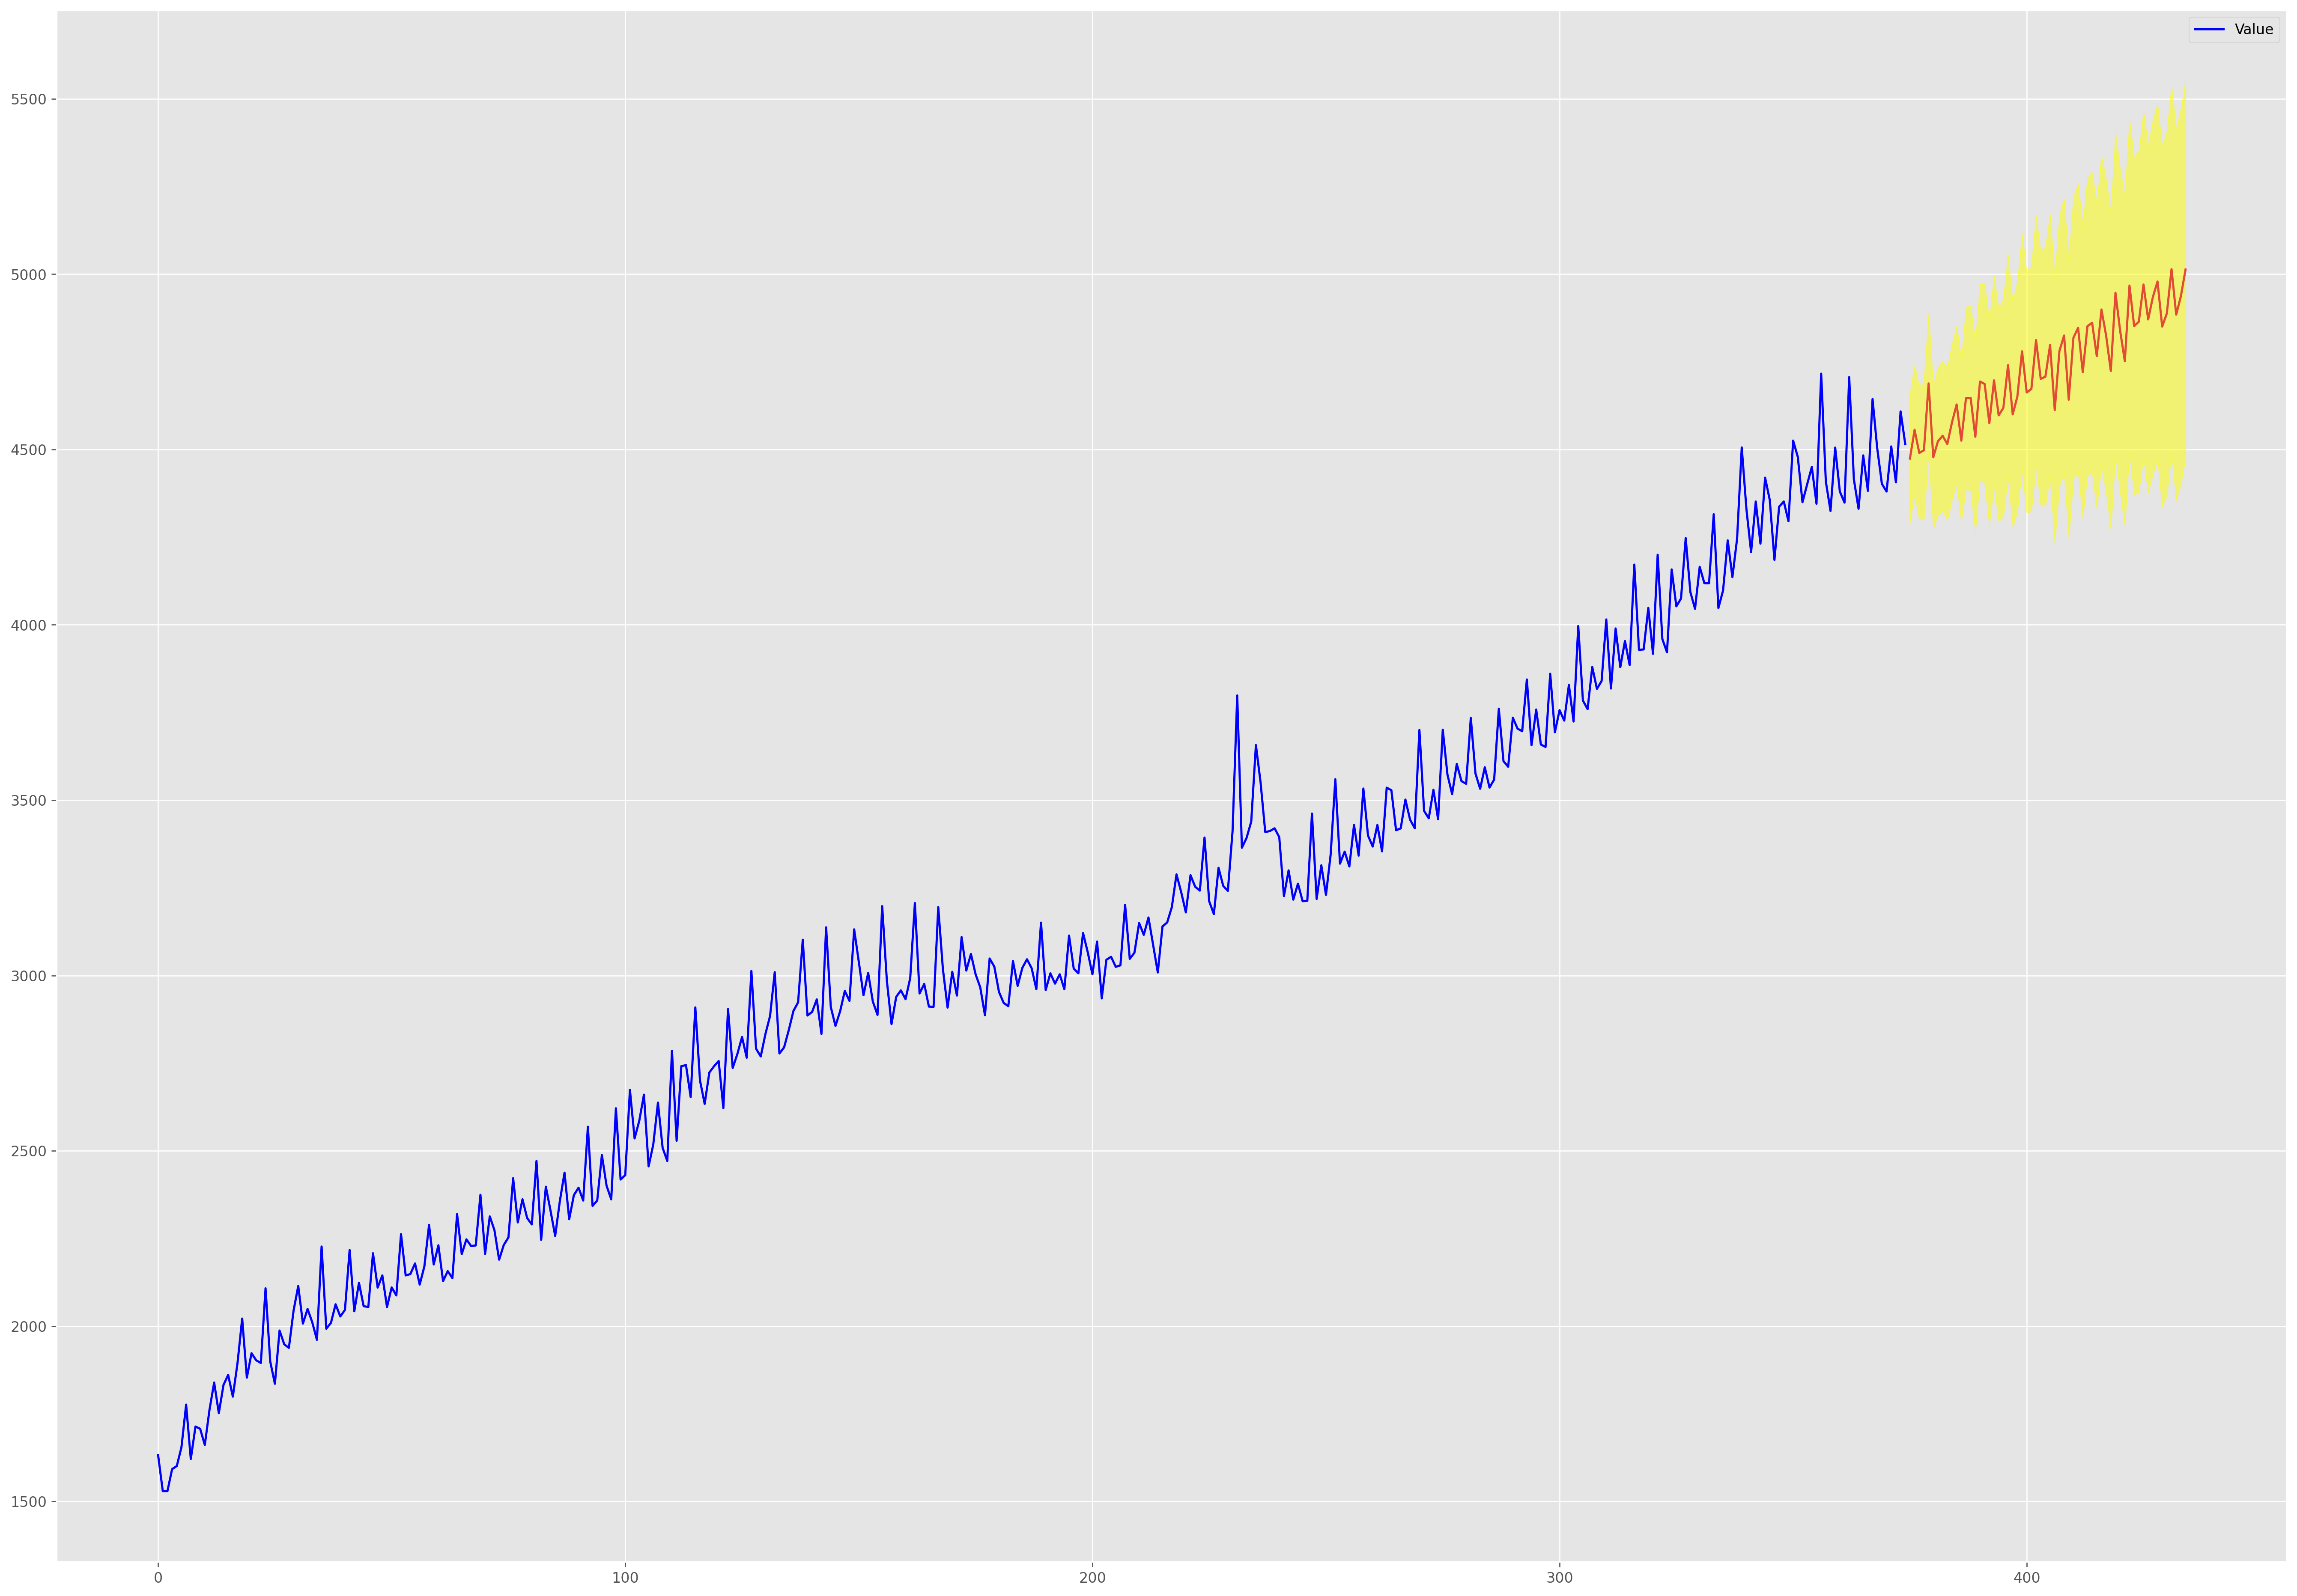

In [93]:
#Forecasting 
forecast_values = best_model.get_forecast(steps = 60)
forecast_ci = forecast_values.conf_int()

ax = df['Value'].plot(figsize = (28, 20), legend = True, color='blue')
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (28, 20), grid=True)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)
ax.axes.get_xaxis().set_visible(True)
plt.show()